In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.plots import *
import os

In [3]:
PATH = 'data/plant_seedling/'
! ls {PATH}/train

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [12]:
titles = []
list_paths = []
for sub in os.listdir(f'{PATH}train/')[:5]:
    for i in os.listdir(f'{PATH}train/'+ sub + '/')[:5]:
        titles.append(sub)
        list_paths.append(f'{PATH}train/'+ sub + '/'+ i)
print(list(zip(titles,list_paths)))

[('Cleavers', 'data/plant_seedling/train/Cleavers/0bec204c7.png'), ('Cleavers', 'data/plant_seedling/train/Cleavers/d8597aa6a.png'), ('Cleavers', 'data/plant_seedling/train/Cleavers/7e8212b65.png'), ('Cleavers', 'data/plant_seedling/train/Cleavers/58b68b1ea.png'), ('Cleavers', 'data/plant_seedling/train/Cleavers/ef4a36963.png'), ('Sugar beet', 'data/plant_seedling/train/Sugar beet/b0264558c.png'), ('Sugar beet', 'data/plant_seedling/train/Sugar beet/222d5c406.png'), ('Sugar beet', 'data/plant_seedling/train/Sugar beet/e053702bb.png'), ('Sugar beet', 'data/plant_seedling/train/Sugar beet/28acd4b0b.png'), ('Sugar beet', 'data/plant_seedling/train/Sugar beet/0f30a59c2.png'), ('Scentless Mayweed', 'data/plant_seedling/train/Scentless Mayweed/8d65bde6a.png'), ('Scentless Mayweed', 'data/plant_seedling/train/Scentless Mayweed/a29a89017.png'), ('Scentless Mayweed', 'data/plant_seedling/train/Scentless Mayweed/078d42d74.png'), ('Scentless Mayweed', 'data/plant_seedling/train/Scentless Mayweed/

In [13]:
def get_1st(path): return glob(f'{path}/*.*')[0]

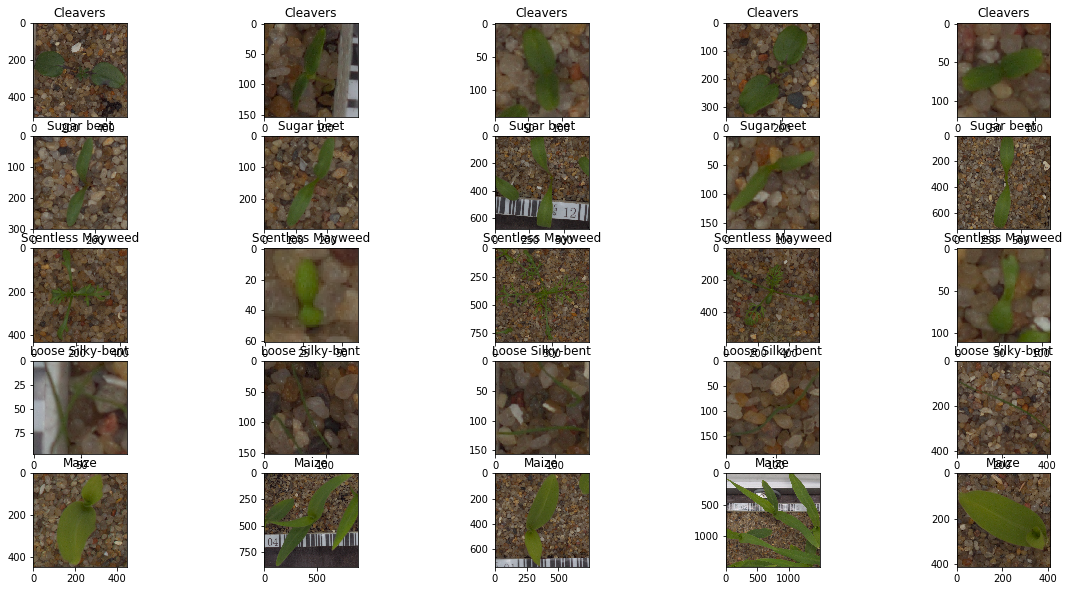

In [30]:
fig = plt.figure(figsize=(20,10))
rows=columns=5
#print(len(list_paths))
for i in range(0, len(list_paths)):
    #print(i, list_paths[i])
    img = Image.open(list_paths[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title(titles[i])
    plt.imshow(img)
plt.show()

In [55]:
import math

def split_validation(train_path, validation_path):
    if not os.path.exists(validation_path):
        os.makedirs(validation_path)
    for class_dir in os.listdir(train_path):
        print(train_path + class_dir)
        files = next(os.walk(train_path + class_dir))[2]
        validation_prop = math.ceil(0.2 * len(files))
        #files_to_move = files[0 : validation_prop]
        files_to_move = random.sample(files, validation_prop)
        print(class_dir, len(files),  len(files_to_move))
        if not os.path.exists(validation_path + class_dir):
            os.makedirs(validation_path + class_dir)
        src = train_path + class_dir + '/'
        dest = validation_path + class_dir + '/'
        for file_name in files_to_move:
            print (src + file_name , ' ', dest + file_name)
            shutil.move(src + file_name , dest + file_name)

In [56]:
train_path = 'data/plant_seedling/train/'
validation_path = 'data/plant_seedling/valid/'
split_validation(train_path, validation_path)

data/plant_seedling/train/Cleavers
Cleavers 287 58
data/plant_seedling/train/Cleavers/3d9ea1649.png   data/plant_seedling/valid/Cleavers/3d9ea1649.png
data/plant_seedling/train/Cleavers/db4d4f5a7.png   data/plant_seedling/valid/Cleavers/db4d4f5a7.png
data/plant_seedling/train/Cleavers/1c43f8251.png   data/plant_seedling/valid/Cleavers/1c43f8251.png
data/plant_seedling/train/Cleavers/aa2c378e7.png   data/plant_seedling/valid/Cleavers/aa2c378e7.png
data/plant_seedling/train/Cleavers/c9576e39e.png   data/plant_seedling/valid/Cleavers/c9576e39e.png
data/plant_seedling/train/Cleavers/fab297bc9.png   data/plant_seedling/valid/Cleavers/fab297bc9.png
data/plant_seedling/train/Cleavers/ef4a36963.png   data/plant_seedling/valid/Cleavers/ef4a36963.png
data/plant_seedling/train/Cleavers/7e501d74c.png   data/plant_seedling/valid/Cleavers/7e501d74c.png
data/plant_seedling/train/Cleavers/d4803dca4.png   data/plant_seedling/valid/Cleavers/d4803dca4.png
data/plant_seedling/train/Cleavers/c5f57467a.png 

data/plant_seedling/train/Fat Hen/1266ac5cb.png   data/plant_seedling/valid/Fat Hen/1266ac5cb.png
data/plant_seedling/train/Fat Hen/2412cb19b.png   data/plant_seedling/valid/Fat Hen/2412cb19b.png
data/plant_seedling/train/Fat Hen/22cd06b64.png   data/plant_seedling/valid/Fat Hen/22cd06b64.png
data/plant_seedling/train/Fat Hen/efaab2370.png   data/plant_seedling/valid/Fat Hen/efaab2370.png
data/plant_seedling/train/Fat Hen/0dfbbc7fe.png   data/plant_seedling/valid/Fat Hen/0dfbbc7fe.png
data/plant_seedling/train/Fat Hen/1bdf63082.png   data/plant_seedling/valid/Fat Hen/1bdf63082.png
data/plant_seedling/train/Fat Hen/91a5d8724.png   data/plant_seedling/valid/Fat Hen/91a5d8724.png
data/plant_seedling/train/Charlock
Charlock 390 78
data/plant_seedling/train/Charlock/57b972eb5.png   data/plant_seedling/valid/Charlock/57b972eb5.png
data/plant_seedling/train/Charlock/13d67633c.png   data/plant_seedling/valid/Charlock/13d67633c.png
data/plant_seedling/train/Charlock/fd3e62689.png   data/plant_s

In [83]:
arch = resnet50
sz = 64
bs = 64

In [57]:
tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='train', val_name='valid', test_name='test')

In [59]:
len(data.classes)

12

In [60]:
print(len(data.trn_ds), len(data.val_ds), len(data.test_ds))

3794 956 794


In [61]:
# Check if the total number of  classes representing training samples are present in validation also
print (len(np.unique(data.trn_ds.y)))
print(len(np.unique(data.val_ds.y)))
if(len(np.unique(data.trn_ds.y)) == len(np.unique(data.val_ds.y))):
    print('perfect')
else:
    print('no match')

12
12
perfect


In [62]:
len(data.classes), data.classes[:5]

(12,
 ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat'])

In [63]:
size_dict = {k : PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames }
row_sz, col_sz =list(zip(*size_dict.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

(array([2562.,  931.,  216.,   60.,   14.,    5.,    2.,    2.,    0.,    2.]),
 array([  49. ,  443.2,  837.4, 1231.6, 1625.8, 2020. , 2414.2, 2808.4, 3202.6, 3596.8, 3991. ]),
 <a list of 10 Patch objects>)

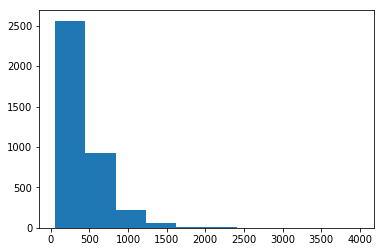

In [64]:
plt.hist(row_sz)

(array([2321., 1064.,  261.,  101.,   29.,   11.,    2.,    2.,    0.,    3.]),
 array([  49. ,  389.8,  730.6, 1071.4, 1412.2, 1753. , 2093.8, 2434.6, 2775.4, 3116.2, 3457. ]),
 <a list of 10 Patch objects>)

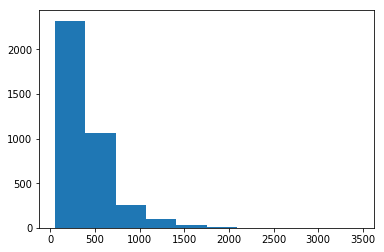

In [65]:
plt.hist(col_sz)

In [84]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
    data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='train', val_name='valid', test_name='test')    
    data = data.resize(int(sz*1.3), 'tmp')
    return data

In [85]:
data = get_data(sz, bs)
learn = ConvLearner.pretrained(arch, data)
learn.lr_find()

 90%|█████████ | 54/60 [00:03<00:00, 14.93it/s, loss=11.2]


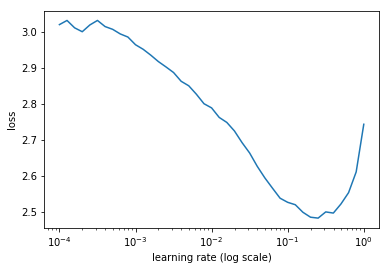

In [86]:
learn.sched.plot()

In [88]:
lr = 0.09
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.831267   0.694127   0.743724  
    1      0.866457   1.31728    0.574268                  
    2      0.794033   0.702055   0.742678                  
    3      0.671575   0.562975   0.791841                  
    4      0.892781   0.888708   0.670502                  
    5      0.854706   0.929411   0.65795                   
    6      0.785174   0.87146    0.710251                  
    7      0.673872   0.620665   0.793933                  
    8      0.582323   0.530551   0.813808                  
    9      0.508435   0.451653   0.838912                  
    10     0.436037   0.470247   0.82113                   
    11     0.383742   0.43825    0.84205                   
    12     0.362119   0.442769   0.850418                  



[array([0.44277]), 0.8504184082960983]

In [90]:
sz = 128
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.271171   0.439958   0.850418  
    1      0.30049    0.541744   0.813808                  
    2      0.269085   0.422113   0.857741                  
    3      0.307979   0.837852   0.761506                  
    4      0.30584    0.443424   0.860879                  
    5      0.248367   0.437706   0.865063                  
    6      0.193217   0.385504   0.872385                  



[array([0.3855]), 0.8723849384854528]

In [91]:
sz = 256
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.225008   0.401255   0.862971  
    1      0.345322   0.547093   0.808577                  
    2      0.278026   0.44845    0.850418                  
    3      0.223862   0.413451   0.853556                  
    4      0.306733   0.644602   0.813808                  
    5      0.302949   1.209814   0.669456                  
    6      0.277198   0.606159   0.819038                  
    7      0.25272    0.560554   0.819038                  
    8      0.218616   0.449062   0.861925                  
    9      0.159661   0.406701   0.860879                  
    10     0.156363   0.382458   0.873431                  
    11     0.127368   0.375425   0.885983                  
    12     0.112198   0.374937   0.879707                  



[array([0.37494]), 0.8797071124719277]

In [92]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                   
    0      0.158812   0.387232   0.872385  
    1      0.197906   0.516694   0.85251                   
    2      0.172184   0.38363    0.868201                  
    3      0.140262   0.369045   0.879707                  
    4      0.214279   0.651392   0.816946                  
    5      0.222943   0.475078   0.85251                   
    6      0.250431   0.576956   0.814854                  
    7      0.234375   0.419398   0.859833                  
    8      0.175732   0.532445   0.835774                  
    9      0.147625   0.424824   0.864017                  
    10     0.110576   0.406601   0.872385                  
    11     0.084714   0.405155   0.869247                   
    12     0.078339   0.408733   0.870293                   



[array([0.40873]), 0.8702928855329378]

In [93]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=4)

epoch      trn_loss   val_loss   accuracy                   
    0      0.105796   0.45353    0.869247  
    1      0.142333   0.790483   0.785565                  
    2      0.135403   0.476855   0.85251                   
    3      0.108636   0.42544    0.878661                  
    4      0.096886   0.416753   0.875523                   
    5      0.16415    0.689077   0.8159                    
    6      0.190972   0.648211   0.814854                  
    7      0.172977   0.535288   0.827406                  
    8      0.152568   0.642909   0.838912                  
    9      0.142589   0.533241   0.839958                  
    10     0.127309   0.699056   0.833682                  
    11     0.110336   0.46519    0.870293                  
    12     0.084983   0.499457   0.860879                   
    13     0.072679   0.460876   0.873431                   
    14     0.069017   0.43365    0.892259                   
    15     0.055972   0.454109   0.891213          

[array([0.42745]), 0.8891213391615257]

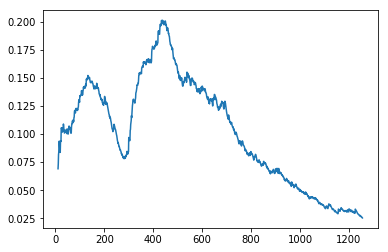

In [94]:
learn.sched.plot_loss()

In [75]:
preds, y = learn.TTA(is_test = True)

In [76]:
print(y.shape, preds.shape)

(794, 1) (5, 794, 12)


In [79]:
def create_csv(preds, y, subm_no, isTTA):
    if isTTA:
        final_preds = np.mean(preds, 0)
    else:
        final_preds = preds
    high_probs = np.max(final_preds,1)
    high_prob_index = np.argmax(final_preds,1)
    print(high_prob_index, high_probs, np.exp(high_probs))
    print(np.unique(high_prob_index, return_counts=True))
    high_prob_class = [ data.classes[index] for index in high_prob_index ]
    output_df = pd.DataFrame(high_prob_class, columns=['species'])
    output_df.insert(loc = 0, column = 'file', value = [name[5:] for name in data.test_ds.fnames])
    print(output_df.head())
    SUBM = f'{PATH}subm/'
    os.makedirs(SUBM, exist_ok = True)
    output_df.to_csv(f'{SUBM}subm_plant_seedling_'+ str(subm_no) +'.csv', index=False)
    FileLink(f'{SUBM}subm_plant_seedling_'+ str(subm_no) +'.csv')

In [80]:
create_csv(preds, y, 1, True)

[ 4 10 10  7 10  7  6  3  4  4  3  6  3  8  1  9  6  9  6  1  7  6 10  2  3  3  0  6  8  5  3  7 10  6  5  6
  3  7 10 10  6  4 10  3  3  4  2  6  1  1  8  6  4  2 11 11  6  5  5  4  7  3  6  6  0  9  7  2  6  9  6  5
  8  7  0  6  3 11  8 10  3  6  3  6 10  9  1  7  8  0  8  8  2 10  3  3  2  2  2  3  8  8  9  7  5  4  6  3
  8 11  9  1  8  7  3  2  0 10  4 11 11  1  0  6  0 10  6  3  8  6  8  1 11  1  3  1  6  6 11  6 10  0  3  1
  1  3  2  4 10  0  5 11  5  9  1  7  1  4  6  8  3  1  5  8  8  6  6  3 11  5 11 10  9 11 10  3  5  3  6 10
  5  3  6  3  0  9 11 10  1  0 10  8  4  6  8 10 10  1  4  6  0  4  3 10  7  8  6 10  2  1 10  2  3  2 11  1
  6  6  3  1  6  7  6  6  6  6 11  7  3  6  1  5  6  8  2  1  5  6 10  9  1  1  3  1 11  6  2  1  9  9  9  8
 11 11  9 11 11  4  4  3  2  6  5  6 11  3  8  8  5 11  3  4  3  6  8  5  1  6  6  8  6  4  3  8  1  9  6 11
  5  6  8  8 10  6  2  5  5  2 10  8  3  9  3  8  4 11  5 10 10  2  0  6 10  2 11  6  5  6 11  1 11 11  5  0
  7  3 10  6  5  5 

In [82]:
learn.get_layer_groups()

[[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
  ReLU(inplace),
  MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False),
  Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff